# Preliminaries

## Introduction to the Jupyter notebook

The notebook is organised in 4 sections:

*   ***Section 1***: includes some **preliminary steps** like uploading libraries to be used in the notebook and loading the dataset.
*   ***Section 2***: includes **dataset exploration** and **preparation** so it can be used by the recommender system.
*   ***Section 3***: simulates a **user selection of ten books**. A random category out of 192 book categories is selected and ten random book titles within that category are chosen.
*   ***Section 4***: is the **recommender system** that asserts book facts and runs CLIPS rules to identify a common category between the selected books. The category may actually vary from the one in Section 3 but is usually quite similar to that category. The rules lead to more asserted facts until the user is presented with a ranked recommended list of books that should share similar book categories as the books selected in Section 3.

See the following process flow from the Assignment Appendix which can also be downloaded from https://github.com/Sean-from-Malta/Module-9/blob/main/process%20flow.png  

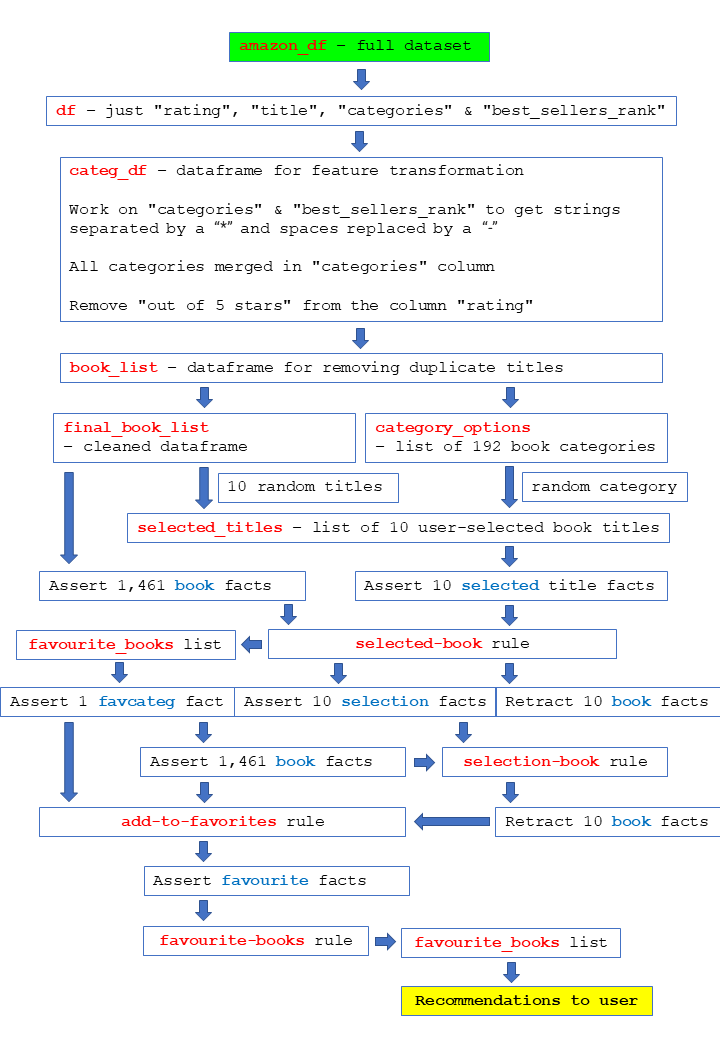

## Import Python modules and packages 


CLIPSPy introduces CLIPS capabilities within Python. CLIPS is a rule-based programming language useful for creating expert systems imitating human knowledge or expertise. (Python Software Foundation, 2023a)

The Python module **re** supports regular expressions, that is a sequence of special characters to find patterns in a string. (Python Software Foundation, 2023d)

**pandas** is a Python package that offers an open source data analysis and manipulation tool that is quick, strong, flexible, and simple to use.  (Singh, 2020)

**Counter**</b> is a collection in which the elements are stored as dictionary keys and their counts as dictionary values. (Python Software Foundation, 2023b)

The **Random** library can be used to generate random numbers in Python. (Python Software Foundation, 2023c)



### References: 

Python Software Foundation (a). 2023. clipspy 1.0.0. [online] available at: https://pypi.org/project/clipspy/ [Accessed 28 February 2023]

Python Software Foundation (b). 2023. collections — Container datatypes. [online] available at: https://docs.python.org/3/library/collections.html [Accessed 28 February 2023]

Python Software Foundation (c). 2023. random — Generate pseudo-random numbers. [online] available at: https://docs.python.org/3/library/random.html [Accessed 28 February 2023]

Python Software Foundation (d). 2023. re — Regular expression operations. [online] available at: https://docs.python.org/3/library/re.html [Accessed 28 February 2023]

Singh, M. 2020. Python — Extracting URLs from strings. [online] available at: https://macxima.medium.com/python-extracting-urls-from-strings-21dc82e2142b [Accessed 28 February 2023]


In [187]:
!pip install clipspy #install clipspy if library not installed

import re # import for regular expressions

import pandas as pd # import pandas for data analysis and manipulation

from collections import Counter # import counter 

import random

# Import the Environment and LoggingRouter classes from the clips module
from clips import Environment, LoggingRouter
import logging
import clips


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Amazon Books Dataset.

In [188]:
# read the amazon books dataset csv file
amazon_df = pd.read_csv('https://raw.githubusercontent.com/Sean-from-Malta/Module-9/main/Amazon_popular_books_dataset.csv')

# get preview and size of the dataframe
amazon_df

,asin,ISBN10,answered_questions,availability,brand,currency,date_first_available,delivery,department,description,...,upc,url,video,video_count,categories,best_sellers_rank,buybox_seller,image,number_of_sellers,colors
0,7350813,7350813,0,In Stock.,Emily Brontë,USD,NaN,"[""FREE delivery Tuesday, December 28 if you sp...",NaN,NaN,...,NaN,https://www.amazon.com/dp/0007350813,NaN,0,"[""Books"",""Literature & Fiction"",""Genre Fiction""]","[{""category"":""Books / Literature & Fiction / H...",NaN,NaN,NaN,NaN
1,7513763,9.78001E+12,0,In Stock.,Drew Daywalt,USD,NaN,"[""FREE delivery Tuesday, December 28 if you sp...",NaN,NaN,...,NaN,https://www.amazon.com/dp/0007513763,NaN,0,"[""Books"",""Children's Books"",""Literature & Fict...","[{""category"":""Books / Children's Books / Liter...",VMG Books & Media,NaN,NaN,NaN
2,8183988,8183988,0,NaN,Bernard Cornwell,USD,NaN,"[""FREE delivery January 4 - 10 if you spend $2...",NaN,NaN,...,NaN,https://www.amazon.com/dp/0008183988,NaN,0,"[""Books"",""Literature & Fiction"",""Genre Fiction""]","[{""category"":""Books / Literature & Fiction / H...",Reuseaworld,NaN,NaN,NaN
3,8305838,8305838,0,In Stock.,David Walliams,USD,NaN,"[""FREE delivery Tuesday, December 28 if you sp...",NaN,NaN,...,NaN,https://www.amazon.com/dp/0008305838,NaN,0,"[""Books"",""Children's Books"",""Literature & Fict...","[{""category"":""Books / Children's Books / Liter...",Bahamut Media,NaN,NaN,NaN
4,8375526,8375526,0,In Stock.,Caroline Hirons,USD,NaN,"[""FREE delivery Tuesday, December 28"",""Or fast...",NaN,NaN,...,NaN,https://www.amazon.com/dp/0008375526,NaN,0,"[""Books"",""Crafts, Hobbies & Home"",""Home Improv...","[{""category"":""Books / Health, Fitness & Dietin...",KathrynAshleyGallery,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,B07P5BPVGM,NaN,0,NaN,Jess Lourey,USD,NaN,[],NaN,NaN,...,NaN,https://www.amazon.com/dp/B07P5BPVGM,NaN,0,"[""Books"",""Mystery, Thriller & Suspense"",""Thril...","[{""category"":""Books / Mystery, Thriller & Susp...",NaN,NaN,NaN,NaN
2265,B07P5JBCFL,NaN,0,NaN,"Heidi Murkoff (Author, Narrator), Meeghan Hola...",USD,NaN,[],NaN,NaN,...,NaN,https://www.amazon.com/dp/B07P5JBCFL,NaN,0,"[""Books"",""Health, Fitness & Dieting"",""Women's ...","[{""category"":""Books / Health, Fitness & Dietin...",NaN,NaN,NaN,NaN
2266,B07NF7DFS2,NaN,0,NaN,"Clea Shearer (Author, Narrator), Joanna Teplin...",USD,NaN,[],NaN,NaN,...,NaN,https://www.amazon.com/dp/B07NF7DFS2,NaN,0,"[""Books"",""Crafts, Hobbies & Home"",""Home Improv...","[{""category"":""Audible Books & Originals / Home...",NaN,NaN,NaN,NaN
2267,B07P67N918,NaN,0,NaN,"Lisa Jewell (Author), Tamaryn Payne (Narrator)...",USD,NaN,[],NaN,NaN,...,NaN,https://www.amazon.com/dp/B07P67N918,NaN,0,"[""Books"",""Mystery, Thriller & Suspense"",""Thril...","[{""category"":""Audible Books & Originals / Myst...",NaN,NaN,NaN,NaN


In [189]:
# get column names and data types
print (amazon_df.dtypes)


asin                     object
ISBN10                   object
answered_questions        int64
availability             object
brand                    object
currency                 object
date_first_available     object
delivery                 object
department              float64
description              object
discount                float64
domain                   object
features                 object
final_price             float64
format                   object
image_url                object
images_count              int64
initial_price           float64
item_weight              object
manufacturer             object
model_number             object
plus_content            float64
product_dimensions       object
rating                   object
reviews_count             int64
root_bs_rank            float64
seller_id                object
seller_name              object
timestamp                object
title                    object
upc                     float64
url     

One can choose some headings useful for a book recommendation system

In [190]:
df = pd.DataFrame(amazon_df[['rating', 'title', 'categories', 'best_sellers_rank']])


df    # get preview and size of the dataframe

,rating,title,categories,best_sellers_rank
0,4.6 out of 5 stars,Wuthering Heights (Collins Classics),"[""Books"",""Literature & Fiction"",""Genre Fiction""]","[{""category"":""Books / Literature & Fiction / H..."
1,4.8 out of 5 stars,THE DAYS THE CRAYONS QUIT,"[""Books"",""Children's Books"",""Literature & Fict...","[{""category"":""Books / Children's Books / Liter..."
2,4.8 out of 5 stars,War Lord: Book 13 (The Last Kingdom Series),"[""Books"",""Literature & Fiction"",""Genre Fiction""]","[{""category"":""Books / Literature & Fiction / H..."
3,4.8 out of 5 stars,Code Name Bananas: The hilarious and epic new ...,"[""Books"",""Children's Books"",""Literature & Fict...","[{""category"":""Books / Children's Books / Liter..."
4,4.8 out of 5 stars,Skincare: The award-winning ultimate no-nonsen...,"[""Books"",""Crafts, Hobbies & Home"",""Home Improv...","[{""category"":""Books / Health, Fitness & Dietin..."
...,...,...,...,...
2264,4.2 out of 5 stars,Unspeakable Things,"[""Books"",""Mystery, Thriller & Suspense"",""Thril...","[{""category"":""Books / Mystery, Thriller & Susp..."
2265,4.8 out of 5 stars,What to Expect When You’re Expecting,"[""Books"",""Health, Fitness & Dieting"",""Women's ...","[{""category"":""Books / Health, Fitness & Dietin..."
2266,4.7 out of 5 stars,The Home Edit: A Guide to Organizing and Reali...,"[""Books"",""Crafts, Hobbies & Home"",""Home Improv...","[{""category"":""Audible Books & Originals / Home..."
2267,4.4 out of 5 stars,The Family Upstairs: A Novel,"[""Books"",""Mystery, Thriller & Suspense"",""Thril...","[{""category"":""Audible Books & Originals / Myst..."


# Exploring and preparing the dataset

## Exploring Amazon books categories

Tha Amazon website appears to have 32 main book categories. Let us see if we can assign each book within the dataset at least one of these categories. 

The dataset seems to have to columns with information on book categories. The following code will look for the 32 main categories in these columns and store it as a Dataframe seperate column.

In [191]:
# define the Amazon 32 main books categories
keywords = ['Arts & Photography', 'Biographies', 'Business & Money', 'Calendars', "Children", 'Christian Books & Bibles', 'Comics & Graphic Novels', 'Computers & Technology', 'Cookbooks, Food & Wine', 'Crafts, Hobbies & Home', 'Education & Teaching', 'Engineering & Transportation', 'Health, Fitness & Dieting', 'History', 'Humor & Entertainment', 'Law', 'LGBTQ+', 'Literature & Fiction', 'Medical', 'Mystery, Thriller & Suspense', 'Parenting & Relationships', 'Politics & Social Sciences', 'Reference', 'Religion & Spirituality', 'Romance', 'Science & Math', 'Science Fiction & Fantasy', 'Self-Help', 'Sports & Outdoors', 'Teen & Young Adult', 'Test Preparation', 'Travel']


# define a function which searches for keywords in the 'categories' and 'best_sellers_rank' columns in a dataframe row.

def extract_category(row):

    category1 = row['categories']
    category2 = row['best_sellers_rank']

    matches = []  # create list called matches

    for keyword in keywords: # for each keyword

        # If there is a match add the keyword to the matches list
        if keyword in category1 or keyword in category2:
            matches.append(keyword)

    return '*'.join(matches) # return different keywords separated by an asterisk

df['categories'] = df['categories'].astype(str)               # convert column to string
df['best_sellers_rank'] = df['best_sellers_rank'].astype(str) # convert column to string
df['Amazon_categ'] = df.apply(extract_category, axis=1)       # apply extract_category to all df and stored in a new column called Amazon_categ

# preview of updated dataframe df
df


,rating,title,categories,best_sellers_rank,Amazon_categ
0,4.6 out of 5 stars,Wuthering Heights (Collins Classics),"[""Books"",""Literature & Fiction"",""Genre Fiction""]","[{""category"":""Books / Literature & Fiction / H...",Literature & Fiction
1,4.8 out of 5 stars,THE DAYS THE CRAYONS QUIT,"[""Books"",""Children's Books"",""Literature & Fict...","[{""category"":""Books / Children's Books / Liter...",Children*Literature & Fiction
2,4.8 out of 5 stars,War Lord: Book 13 (The Last Kingdom Series),"[""Books"",""Literature & Fiction"",""Genre Fiction""]","[{""category"":""Books / Literature & Fiction / H...",Literature & Fiction
3,4.8 out of 5 stars,Code Name Bananas: The hilarious and epic new ...,"[""Books"",""Children's Books"",""Literature & Fict...","[{""category"":""Books / Children's Books / Liter...",Children*Literature & Fiction
4,4.8 out of 5 stars,Skincare: The award-winning ultimate no-nonsen...,"[""Books"",""Crafts, Hobbies & Home"",""Home Improv...","[{""category"":""Books / Health, Fitness & Dietin...","Crafts, Hobbies & Home*Health, Fitness & Dieti..."
...,...,...,...,...,...
2264,4.2 out of 5 stars,Unspeakable Things,"[""Books"",""Mystery, Thriller & Suspense"",""Thril...","[{""category"":""Books / Mystery, Thriller & Susp...","Mystery, Thriller & Suspense"
2265,4.8 out of 5 stars,What to Expect When You’re Expecting,"[""Books"",""Health, Fitness & Dieting"",""Women's ...","[{""category"":""Books / Health, Fitness & Dietin...","Health, Fitness & Dieting*Parenting & Relation..."
2266,4.7 out of 5 stars,The Home Edit: A Guide to Organizing and Reali...,"[""Books"",""Crafts, Hobbies & Home"",""Home Improv...","[{""category"":""Audible Books & Originals / Home...","Crafts, Hobbies & Home"
2267,4.4 out of 5 stars,The Family Upstairs: A Novel,"[""Books"",""Mystery, Thriller & Suspense"",""Thril...","[{""category"":""Audible Books & Originals / Myst...","Mystery, Thriller & Suspense"


In [192]:
# identify blank instances in the Amazon_categ column
no_results_df = df[df['Amazon_categ'].apply(len) == 0]

# show blank instances
no_results_df

,rating,title,categories,best_sellers_rank,Amazon_categ
2029,4.8 out of 5 stars,"VTech Musical Rhymes Book, Pink","[""Toys & Games"",""Learning & Education"",""Electr...","[{""category"":""Toys & Games"",""rank"":72},{""categ...",


In [193]:
# fill missing value with an adequate Amazon main book category
df.at[2029, 'Amazon_categ'] = "Education & Teaching"

df['Amazon_categ'] = df['Amazon_categ'].astype(str) # convert column to string

# check again for missing values 
no_results_df = df[df['Amazon_categ'].apply(len) == 0]

# check if ready
no_results_df


,rating,title,categories,best_sellers_rank,Amazon_categ


Now it useful to see the frequency of the different categories.

In [194]:
# Count the number of rows that have each keyword
counts = {}
for keyword in keywords:
    counts[keyword] = df['Amazon_categ'].apply(lambda x: keyword in x).sum()

# Print the counts for each keyword
for keyword, count in counts.items():
    print(f"{keyword}: {count}")

# Count the number of rows that have 1 or more categories
df['num_categories'] = df['Amazon_categ'].str.count('\*') + 1
category_counts = df['num_categories'].value_counts().sort_index()
print("rows with different categories:")
print(category_counts)

Arts & Photography: 44
Biographies: 190
Business & Money: 110
Calendars: 1
Children: 358
Christian Books & Bibles: 64
Comics & Graphic Novels: 45
Computers & Technology: 13
Cookbooks, Food & Wine: 33
Crafts, Hobbies & Home: 55
Education & Teaching: 35
Engineering & Transportation: 8
Health, Fitness & Dieting: 147
History: 176
Humor & Entertainment: 74
Law: 36
LGBTQ+: 38
Literature & Fiction: 1089
Medical: 88
Mystery, Thriller & Suspense: 479
Parenting & Relationships: 29
Politics & Social Sciences: 180
Reference: 151
Religion & Spirituality: 124
Romance: 241
Science & Math: 57
Science Fiction & Fantasy: 355
Self-Help: 134
Sports & Outdoors: 26
Teen & Young Adult: 161
Test Preparation: 15
Travel: 59
rows with different categories:
1    765
2    946
3    360
4    134
5     47
6     12
7      5
Name: num_categories, dtype: int64


In [195]:
#show a preview of updated dataframe
df

,rating,title,categories,best_sellers_rank,Amazon_categ,num_categories
0,4.6 out of 5 stars,Wuthering Heights (Collins Classics),"[""Books"",""Literature & Fiction"",""Genre Fiction""]","[{""category"":""Books / Literature & Fiction / H...",Literature & Fiction,1
1,4.8 out of 5 stars,THE DAYS THE CRAYONS QUIT,"[""Books"",""Children's Books"",""Literature & Fict...","[{""category"":""Books / Children's Books / Liter...",Children*Literature & Fiction,2
2,4.8 out of 5 stars,War Lord: Book 13 (The Last Kingdom Series),"[""Books"",""Literature & Fiction"",""Genre Fiction""]","[{""category"":""Books / Literature & Fiction / H...",Literature & Fiction,1
3,4.8 out of 5 stars,Code Name Bananas: The hilarious and epic new ...,"[""Books"",""Children's Books"",""Literature & Fict...","[{""category"":""Books / Children's Books / Liter...",Children*Literature & Fiction,2
4,4.8 out of 5 stars,Skincare: The award-winning ultimate no-nonsen...,"[""Books"",""Crafts, Hobbies & Home"",""Home Improv...","[{""category"":""Books / Health, Fitness & Dietin...","Crafts, Hobbies & Home*Health, Fitness & Dieti...",3
...,...,...,...,...,...,...
2264,4.2 out of 5 stars,Unspeakable Things,"[""Books"",""Mystery, Thriller & Suspense"",""Thril...","[{""category"":""Books / Mystery, Thriller & Susp...","Mystery, Thriller & Suspense",1
2265,4.8 out of 5 stars,What to Expect When You’re Expecting,"[""Books"",""Health, Fitness & Dieting"",""Women's ...","[{""category"":""Books / Health, Fitness & Dietin...","Health, Fitness & Dieting*Parenting & Relation...",2
2266,4.7 out of 5 stars,The Home Edit: A Guide to Organizing and Reali...,"[""Books"",""Crafts, Hobbies & Home"",""Home Improv...","[{""category"":""Audible Books & Originals / Home...","Crafts, Hobbies & Home",1
2267,4.4 out of 5 stars,The Family Upstairs: A Novel,"[""Books"",""Mystery, Thriller & Suspense"",""Thril...","[{""category"":""Audible Books & Originals / Myst...","Mystery, Thriller & Suspense",1


## Identification of book categories

The 32 main catagories may be a bit too general for the recommender system. Thus some further work on book categories may be needed. 

In [196]:
#create another dataframe copy
categ_df = df

categ_array = categ_df.categories.unique() # save all unique categories in the dataframe

print ("There are " + str(len(categ_array)) + " different groupings")
categ_array # see a preview of category_strings


There are 360 different groupings


array(['["Books","Literature & Fiction","Genre Fiction"]',
       '["Books","Children\'s Books","Literature & Fiction"]',
       '["Books","Crafts, Hobbies & Home","Home Improvement & Design"]',
       '["Books","Literature & Fiction","Mythology & Folk Tales"]',
       '["Books","Children\'s Books","Science Fiction & Fantasy"]',
       '["Books","Children\'s Books","Classics"]',
       '["Books","Business & Money","Investing"]',
       '["Books","Mystery, Thriller & Suspense","Thrillers & Suspense"]',
       '["Books","Christian Books & Bibles","Christian Living"]',
       '["Books","Health, Fitness & Dieting","Diets & Weight Loss"]',
       '["Books","Humor & Entertainment","Humor"]',
       '["Books","Biographies & Memoirs","Arts & Literature"]',
       '["Books","Children\'s Books","Arts, Music & Photography"]',
       '["Books","Politics & Social Sciences","Politics & Government"]',
       '["Books","Self-Help","Happiness"]',
       '["Books","Teen & Young Adult","Literature & Fict

In [197]:
# the following will clean up the categories column
categ_df['categories'] = categ_df['categories'].str.replace('\",\"', '*') # remove punctuation and insert * between different category strings
categ_df['categories'] = categ_df['categories']  + categ_df['Amazon_categ'] # merge the contents from Amazon_categ
categ_df['categories'] = categ_df['categories'].str.replace(' ', '-')     # replace spaces with a dash
categ_df['categories'] = categ_df['categories'].str.replace('&-', '')     # remove &
categ_df['categories'] = categ_df['categories'].str.replace('\[\"', '*')  # remove opening [
categ_df['categories'] = categ_df['categories'].str.replace('\"\]', '*')  # remove closing ]
categ_df['categories'] = categ_df['categories'].str.replace('\'s', '')    # remove apostrophe+s from categories
categ_df['categories'] = categ_df['categories'].str.replace('\'', '')     # remove apostrophes from categories
categ_df['categories'] = categ_df['categories'].str.replace('\,', '')     # remove commas from categories
categ_df['categories'] = categ_df['categories'].str.replace('-Books', '') # remove the word books from categories
categ_df['categories'] = categ_df['categories'].str.replace('Books\*', '') # remove books as a category as it is present throughout
categ_df['categories'] = categ_df['categories'].str.replace('1800s', 'Nineteenth-Century') # fix number
categ_df['categories'] = categ_df['categories'].str.replace('1900s', 'Twentieth-Century') # fix number
categ_df['categories'] = categ_df['categories'].str.replace('20th-Century', 'Twentieth-Century') # fix number
categ_df['categories'] = categ_df['categories'].str.replace('Bibles', 'Bible') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Amateur-Sleuths', 'Amateur-Sleuth') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Biographies', 'Biography') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Devotionals', 'Devotional') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Fice', 'Finance') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Ficial', 'Finance') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Humorous', 'Humor') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Industries', 'Industry') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('LGBTQ\+-Issues', 'LGBTQ+') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Lesbian-Gay-Bisexual-Transgender', 'LGBTQ+') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Literary', 'Literature') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Mathematics', 'Math') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Meditations', 'Meditation') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Military-Wars', 'Military-War') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Mysteries-Detectives', 'Mysteries-Detective') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Mysteries-Thrillers', 'Mystery-Thriller') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Mystery-Thrillers', 'Mystery-Thriller') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Religions', 'Religion') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Thrillers-Suspense', 'Thriller-Suspense') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Westerns', 'Western') # remove double
categ_df['categories'] = categ_df['categories'].str.replace('Witches-Wizards', 'Wizards-Witches') # remove double


# get preview of updated dataframe 
categ_df

<ipython-input-197-8bc7140cd0c1>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  categ_df['categories'] = categ_df['categories'].str.replace('\[\"', '*')  # remove opening [
<ipython-input-197-8bc7140cd0c1>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  categ_df['categories'] = categ_df['categories'].str.replace('\"\]', '*')  # remove closing ]
<ipython-input-197-8bc7140cd0c1>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  categ_df['categories'] = categ_df['categories'].str.replace('\,', '')     # remove commas from categories
<ipython-input-197-8bc7140cd0c1>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  categ_df['categories'] = categ_df['categories'].str.replace('Books\*', '') # remove books as a category as it is present throughout
<ipython-input-197-8bc7140cd0c1>:24: FutureWar

,rating,title,categories,best_sellers_rank,Amazon_categ,num_categories
0,4.6 out of 5 stars,Wuthering Heights (Collins Classics),*Literature-Fiction*Genre-Fiction*Literature-F...,"[{""category"":""Books / Literature & Fiction / H...",Literature & Fiction,1
1,4.8 out of 5 stars,THE DAYS THE CRAYONS QUIT,*Children*Literature-Fiction*Children*Literatu...,"[{""category"":""Books / Children's Books / Liter...",Children*Literature & Fiction,2
2,4.8 out of 5 stars,War Lord: Book 13 (The Last Kingdom Series),*Literature-Fiction*Genre-Fiction*Literature-F...,"[{""category"":""Books / Literature & Fiction / H...",Literature & Fiction,1
3,4.8 out of 5 stars,Code Name Bananas: The hilarious and epic new ...,*Children*Literature-Fiction*Children*Literatu...,"[{""category"":""Books / Children's Books / Liter...",Children*Literature & Fiction,2
4,4.8 out of 5 stars,Skincare: The award-winning ultimate no-nonsen...,*Crafts-Hobbies-Home*Home-Improvement-Design*C...,"[{""category"":""Books / Health, Fitness & Dietin...","Crafts, Hobbies & Home*Health, Fitness & Dieti...",3
...,...,...,...,...,...,...
2264,4.2 out of 5 stars,Unspeakable Things,*Mystery-Thriller-Suspense*Thriller-Suspense*M...,"[{""category"":""Books / Mystery, Thriller & Susp...","Mystery, Thriller & Suspense",1
2265,4.8 out of 5 stars,What to Expect When You’re Expecting,*Health-Fitness-Dieting*Women-Health*Pregnancy...,"[{""category"":""Books / Health, Fitness & Dietin...","Health, Fitness & Dieting*Parenting & Relation...",2
2266,4.7 out of 5 stars,The Home Edit: A Guide to Organizing and Reali...,*Crafts-Hobbies-Home*Home-Improvement-Design*H...,"[{""category"":""Audible Books & Originals / Home...","Crafts, Hobbies & Home",1
2267,4.4 out of 5 stars,The Family Upstairs: A Novel,*Mystery-Thriller-Suspense*Thriller-Suspense*P...,"[{""category"":""Audible Books & Originals / Myst...","Mystery, Thriller & Suspense",1


In [198]:
categ_array = categ_df.best_sellers_rank.unique() # save all unique best_sellers_rank categories in the dataframe

# see a preview of category_strings
print ("There are " + str(len(categ_array)) + " different groupings")
categ_array 

There are 2269 different groupings


array(['[{"category":"Books / Literature & Fiction / Historical Fiction / Short Stories & Anthologies","rank":28},{"category":"Books / Literature & Fiction / Historical Fiction / Short Stories & Anthologies / Short Stories","rank":24}]',
       '[{"category":"Books / Children\'s Books / Literature & Fiction / Religious Fiction / Christian / Friendship","rank":42}]',
       '[{"category":"Books / Literature & Fiction / Historical Fiction / Military","rank":70}]',
       ...,
       '[{"category":"Audible Books & Originals / Home & Garden","rank":75},{"category":"Audible Books & Originals / Home & Garden / House & Home","rank":24}]',
       '[{"category":"Audible Books & Originals / Mystery, Thriller & Suspense / Thriller & Suspense / Domestic Thrillers","rank":13},{"category":"Audible Books & Originals / Mystery, Thriller & Suspense / Thriller & Suspense / Psychological","rank":38},{"category":"Books / Mystery, Thriller & Suspense / Thrillers & Suspense / Domestic","rank":81}]',
       

In [199]:
#have a closer look at best_sellers_rank at strings between /
words_list = sorted(set(word for row in categ_df['best_sellers_rank'] for word in row.replace('/', ' ').split()))
words_list

['$14.99',
 '$3.99',
 '&',
 '(1-11',
 '(22-32',
 '(65-100',
 '(Old',
 '15',
 '17th',
 '1800s","rank":1},{"category":"Books',
 '1900s","rank":18}]',
 '1900s","rank":28},{"category":"Books',
 '1900s","rank":2}]',
 '1900s","rank":88}]',
 '19th',
 '2000s","rank":1},{"category":"Books',
 '2000s","rank":84}]',
 '20th',
 '21st',
 '45',
 'Ab',
 'Abdominal","rank":1}]',
 'Abolition","rank":49}]',
 'Abuse',
 'Abuse","rank":12},{"category":"Books',
 'Abuse","rank":13},{"category":"Books',
 'Abuse","rank":1},{"category":"Books',
 'Abuse","rank":21},{"category":"Books',
 'Abuse","rank":23}]',
 'Abuse","rank":29},{"category":"Books',
 'Abuse","rank":29}]',
 'Abuse","rank":32}]',
 'Abuse","rank":3},{"category":"Books',
 'Abuse","rank":45}]',
 'Abuse","rank":4},{"category":"Books',
 'Abuse","rank":4}]',
 'Abuse","rank":5},{"category":"Books',
 'Abuse","rank":8},{"category":"Books',
 'Academics',
 'Academics","rank":100},{"category":"Books',
 'Academics","rank":10},{"category":"Books',
 'Academics","ra

In [200]:
# clean up categories within best_sellers_rank
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('17th Century', 'Seventeenth-Century') # fix number
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('1800s', 'Nineteenth-Century') # fix number
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('19th Century', 'Nineteenth-Century') # fix number
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('1900s', 'Twentieth-Century') # fix number
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('20th Century', 'Twentieth-Century') # fix number
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('2000s', 'Twenty-First-Century') # fix number
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('21st Century', 'Twenty-First-Century') # fix number
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].apply(lambda x: re.sub(r'\d+', '', x)) # remove all digits
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\[', '') # remove opening part of strings
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('{\"category\"\:\"', '') # remove opening part of strings
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\]', '') # remove closing part of strings
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\"\,\"rank\"\:}', '*') # remove closing part of strings
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace(' / ', '*') # remove punctuation and insert * between different category strings
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace(' ', '-') # replace spaces with a dash
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\,', '') # remove commas
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('-&-', '-') # remove & from categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\'s', '')     # remove apostrophe+s from categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*-minutes-\(--pages\)', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*Two-hours-or-more-\(--pages\)', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*Whispersync-for-Voice', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*Add-Narration-for-\$\.-or-Less', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*Read-Listen-for-\$\.-or-Less', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*Read-Listen-for-Less', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Kindle-Store', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*Kindle-eBooks', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*Kindle-Short-Reads', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*Kindle-Singles', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*Amazon-Original-Stories', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*Prime-Reading', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Books-on-CD', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Audible-Books-Originals', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*eBook-Readers', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*eBook-Readers-Accessories', '') # remove non book categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('-Books\*', '*') # remove the word books
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Books', '') # remove the word books
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\*\*', '*') # remove double*
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\'', '')     # remove apostrophes from categories
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('nan', '')   # remove empty
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('&', '')   # remove &
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Bibles', 'Bible') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Amateur-Sleuths', 'Amateur-Sleuth') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Biographies', 'Biography') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Devotionals', 'Devotional') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Fice', 'Finance') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Ficial', 'Finance') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Humorous', 'Humor') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Industries', 'Industry') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('LGBTQ\+-Issues', 'LGBTQ+') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Lesbian-Gay-Bisexual-Transgender', 'LGBTQ+') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Literary', 'Literature') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Mathematics', 'Math') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Meditations', 'Meditation') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Military-Wars', 'Military-War') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Mysteries-Detectives', 'Mysteries-Detective') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Mysteries-Thrillers', 'Mystery-Thriller') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Mystery-Thrillers', 'Mystery-Thriller') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Religions', 'Religion') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Thrillers-Suspense', 'Thriller-Suspense') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Westerns', 'Western') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('Witches-Wizards', 'Wizards-Witches') # remove double
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\(', '') # remove bracket
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\)', '') # remove bracket
categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('--', '-') # remove bracket


# view updated dataframe
categ_df

<ipython-input-200-0fd9f7d902f0>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\[', '') # remove opening part of strings
<ipython-input-200-0fd9f7d902f0>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('{\"category\"\:\"', '') # remove opening part of strings
<ipython-input-200-0fd9f7d902f0>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\]', '') # remove closing part of strings
<ipython-input-200-0fd9f7d902f0>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  categ_df['best_sellers_rank'] = categ_df['best_sellers_rank'].str.replace('\"\,\"rank\"\:}', '*') # re

,rating,title,categories,best_sellers_rank,Amazon_categ,num_categories
0,4.6 out of 5 stars,Wuthering Heights (Collins Classics),*Literature-Fiction*Genre-Fiction*Literature-F...,*Literature-Fiction*Historical-Fiction*Short-S...,Literature & Fiction,1
1,4.8 out of 5 stars,THE DAYS THE CRAYONS QUIT,*Children*Literature-Fiction*Children*Literatu...,*Children*Literature-Fiction*Religious-Fiction...,Children*Literature & Fiction,2
2,4.8 out of 5 stars,War Lord: Book 13 (The Last Kingdom Series),*Literature-Fiction*Genre-Fiction*Literature-F...,*Literature-Fiction*Historical-Fiction*Military*,Literature & Fiction,1
3,4.8 out of 5 stars,Code Name Bananas: The hilarious and epic new ...,*Children*Literature-Fiction*Children*Literatu...,*Children*Literature-Fiction*Historical-Fictio...,Children*Literature & Fiction,2
4,4.8 out of 5 stars,Skincare: The award-winning ultimate no-nonsen...,*Crafts-Hobbies-Home*Home-Improvement-Design*C...,*Health-Fitness-Dieting*Beauty-Grooming-Style*...,"Crafts, Hobbies & Home*Health, Fitness & Dieti...",3
...,...,...,...,...,...,...
2264,4.2 out of 5 stars,Unspeakable Things,*Mystery-Thriller-Suspense*Thriller-Suspense*M...,*Mystery-Thriller-Suspense*Thriller-Suspense*C...,"Mystery, Thriller & Suspense",1
2265,4.8 out of 5 stars,What to Expect When You’re Expecting,*Health-Fitness-Dieting*Women-Health*Pregnancy...,*Health-Fitness-Dieting*Women-Health*Pregcy-Ch...,"Health, Fitness & Dieting*Parenting & Relation...",2
2266,4.7 out of 5 stars,The Home Edit: A Guide to Organizing and Reali...,*Crafts-Hobbies-Home*Home-Improvement-Design*H...,*Home-Garden*Home-Garden*House-Home*,"Crafts, Hobbies & Home",1
2267,4.4 out of 5 stars,The Family Upstairs: A Novel,*Mystery-Thriller-Suspense*Thriller-Suspense*P...,*Mystery-Thriller-Suspense*Thriller-Suspense*D...,"Mystery, Thriller & Suspense",1


In [201]:
categorieslist = sorted(set(cat for row in categ_df['best_sellers_rank'] for cat in row.split('*'))) # extract categories

#categorieslist = sorted(set(cat for row in categ_df['best_sellers_rank'] for cat in row.split('*')), reverse=True) # to see in reverse

categorieslist.pop(0) # first one is a blank

categorieslist # preview

['Ab-Workouts',
 'Abdominal',
 'Abolition',
 'Abuse',
 'Action-Adventure',
 'Action-Adventure-Manga',
 'Activities-Crafts-Games',
 'Activity',
 'Adaptations',
 'Addiction-Recovery',
 'Administration-Policy',
 'Administrative-Law',
 'Adoption',
 'Advanced-Placement',
 'Adventure',
 'Adventure-Travel',
 'Adventurers-Explorers-Survival',
 'Aeronautics-Space',
 'Afghan-Iraq-Wars',
 'Afghan-War',
 'Africa',
 'African',
 'African-American',
 'African-American-Studies',
 'African-Descent-Black',
 'Aging',
 'Aging-Longevity',
 'Alcoholism',
 'Algebra',
 'Alien-Invasion',
 'Aliens',
 'Allergies',
 'Almanacs',
 'Almanacs-Yearbooks',
 'Alphabet',
 'Alternate-History',
 'Alternative-Complementary-Medicine',
 'Alternative-Medicine',
 'Alternative-Therapies',
 'Amateur-Sleuth',
 'American',
 'American-Civil-War',
 'American-Revolution',
 'Americas',
 'Analysis-Strategy',
 'Anatomy',
 'Anatomy-Physiology',
 'Ancient',
 'Ancient-Civilizations',
 'Ancient-History',
 'Animals',
 'Anime-Cartoons',
 'Anth

In [202]:
# Now to merge the contents from best_sellers_rank to the existing categories
categ_df['categories'] = categ_df['categories'] + "*" + categ_df['best_sellers_rank'] 

categ_df['categories'] = categ_df['categories'].str.replace('\*\*', '*') # remove double seperators
categ_df['categories'] = categ_df['categories'].apply(lambda x: '*'.join(list(set(x.split('*'))))) # keep unique category values


# view updated dataframe
categ_df


<ipython-input-202-522efd220e0c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  categ_df['categories'] = categ_df['categories'].str.replace('\*\*', '*') # remove double seperators


,rating,title,categories,best_sellers_rank,Amazon_categ,num_categories
0,4.6 out of 5 stars,Wuthering Heights (Collins Classics),*Short-Stories-Anthologies*Historical-Fiction*...,*Literature-Fiction*Historical-Fiction*Short-S...,Literature & Fiction,1
1,4.8 out of 5 stars,THE DAYS THE CRAYONS QUIT,*Friendship*Religious-Fiction*Literature-Ficti...,*Children*Literature-Fiction*Religious-Fiction...,Children*Literature & Fiction,2
2,4.8 out of 5 stars,War Lord: Book 13 (The Last Kingdom Series),*Historical-Fiction*Military*Literature-Fictio...,*Literature-Fiction*Historical-Fiction*Military*,Literature & Fiction,1
3,4.8 out of 5 stars,Code Name Bananas: The hilarious and epic new ...,*Historical-Fiction*Military-War*Literature-Fi...,*Children*Literature-Fiction*Historical-Fictio...,Children*Literature & Fiction,2
4,4.8 out of 5 stars,Skincare: The award-winning ultimate no-nonsen...,*Beauty-Grooming-Style*Aging*Medical-Condition...,*Health-Fitness-Dieting*Beauty-Grooming-Style*...,"Crafts, Hobbies & Home*Health, Fitness & Dieti...",3
...,...,...,...,...,...,...
2264,4.2 out of 5 stars,Unspeakable Things,*Thriller-Suspense*Crime*Kidnapping*Mystery-Th...,*Mystery-Thriller-Suspense*Thriller-Suspense*C...,"Mystery, Thriller & Suspense",1
2265,4.8 out of 5 stars,What to Expect When You’re Expecting,*Health-Wellness*Women-Health*Pregcy-Childbirt...,*Health-Fitness-Dieting*Women-Health*Pregcy-Ch...,"Health, Fitness & Dieting*Parenting & Relation...",2
2266,4.7 out of 5 stars,The Home Edit: A Guide to Organizing and Reali...,*How-to-Home-Improvements*House-Home*Cleaning-...,*Home-Garden*Home-Garden*House-Home*,"Crafts, Hobbies & Home",1
2267,4.4 out of 5 stars,The Family Upstairs: A Novel,*Mystery-Thriller-Suspense*Domestic*Thriller-S...,*Mystery-Thriller-Suspense*Thriller-Suspense*D...,"Mystery, Thriller & Suspense",1


## Exploring Ratings

Now the rating column can be simplified to just numbers.

In [203]:
# make a copy of the rating column
categ_df['Old_Rating'] = categ_df['rating'] 

categ_df['rating'] = [re.sub(' out of 5 stars', '', x) for x in categ_df['rating']] # remove "out of 5 stars" from the column "rating"

categ_df # get preview of the revised dataframe


,rating,title,categories,best_sellers_rank,Amazon_categ,num_categories,Old_Rating
0,4.6,Wuthering Heights (Collins Classics),*Short-Stories-Anthologies*Historical-Fiction*...,*Literature-Fiction*Historical-Fiction*Short-S...,Literature & Fiction,1,4.6 out of 5 stars
1,4.8,THE DAYS THE CRAYONS QUIT,*Friendship*Religious-Fiction*Literature-Ficti...,*Children*Literature-Fiction*Religious-Fiction...,Children*Literature & Fiction,2,4.8 out of 5 stars
2,4.8,War Lord: Book 13 (The Last Kingdom Series),*Historical-Fiction*Military*Literature-Fictio...,*Literature-Fiction*Historical-Fiction*Military*,Literature & Fiction,1,4.8 out of 5 stars
3,4.8,Code Name Bananas: The hilarious and epic new ...,*Historical-Fiction*Military-War*Literature-Fi...,*Children*Literature-Fiction*Historical-Fictio...,Children*Literature & Fiction,2,4.8 out of 5 stars
4,4.8,Skincare: The award-winning ultimate no-nonsen...,*Beauty-Grooming-Style*Aging*Medical-Condition...,*Health-Fitness-Dieting*Beauty-Grooming-Style*...,"Crafts, Hobbies & Home*Health, Fitness & Dieti...",3,4.8 out of 5 stars
...,...,...,...,...,...,...,...
2264,4.2,Unspeakable Things,*Thriller-Suspense*Crime*Kidnapping*Mystery-Th...,*Mystery-Thriller-Suspense*Thriller-Suspense*C...,"Mystery, Thriller & Suspense",1,4.2 out of 5 stars
2265,4.8,What to Expect When You’re Expecting,*Health-Wellness*Women-Health*Pregcy-Childbirt...,*Health-Fitness-Dieting*Women-Health*Pregcy-Ch...,"Health, Fitness & Dieting*Parenting & Relation...",2,4.8 out of 5 stars
2266,4.7,The Home Edit: A Guide to Organizing and Reali...,*How-to-Home-Improvements*House-Home*Cleaning-...,*Home-Garden*Home-Garden*House-Home*,"Crafts, Hobbies & Home",1,4.7 out of 5 stars
2267,4.4,The Family Upstairs: A Novel,*Mystery-Thriller-Suspense*Domestic*Thriller-S...,*Mystery-Thriller-Suspense*Thriller-Suspense*D...,"Mystery, Thriller & Suspense",1,4.4 out of 5 stars


Look at range of ratings

In [204]:
arr1 = categ_df.rating.unique() # save all unique ratings in the dataframe

arr1 # get preview of array

array(['4.6', '4.8', '4.7', '4.9', '4.3', '4.4', '4.5', '3.9', '4.2',
       '3.6', '4.0', '4.1', '3.4'], dtype=object)

remove old ranking column

In [205]:
categ_df = categ_df.drop(['Old_Rating', 'num_categories', 'best_sellers_rank', 'Amazon_categ'], axis=1) # drop the old columns 

categ_df # get preview and size of the dataframe

,rating,title,categories
0,4.6,Wuthering Heights (Collins Classics),*Short-Stories-Anthologies*Historical-Fiction*...
1,4.8,THE DAYS THE CRAYONS QUIT,*Friendship*Religious-Fiction*Literature-Ficti...
2,4.8,War Lord: Book 13 (The Last Kingdom Series),*Historical-Fiction*Military*Literature-Fictio...
3,4.8,Code Name Bananas: The hilarious and epic new ...,*Historical-Fiction*Military-War*Literature-Fi...
4,4.8,Skincare: The award-winning ultimate no-nonsen...,*Beauty-Grooming-Style*Aging*Medical-Condition...
...,...,...,...
2264,4.2,Unspeakable Things,*Thriller-Suspense*Crime*Kidnapping*Mystery-Th...
2265,4.8,What to Expect When You’re Expecting,*Health-Wellness*Women-Health*Pregcy-Childbirt...
2266,4.7,The Home Edit: A Guide to Organizing and Reali...,*How-to-Home-Improvements*House-Home*Cleaning-...
2267,4.4,The Family Upstairs: A Novel,*Mystery-Thriller-Suspense*Domestic*Thriller-S...


## Cleaning Duplicate Book Titles

The next phase is to check if there are duplicate titles

In [206]:
duplicate_books = categ_df[df.duplicated(['title'])] # check for duplicate strings in the column 'title'

duplicate_books = duplicate_books.sort_values(by='title') # sort by the column 'title'

print(duplicate_books)

     rating                                              title  \
269     4.8            12 Rules for Life: An Antidote to Chaos   
2198    4.8            12 Rules for Life: An Antidote to Chaos   
418     4.7                                               1984   
786     4.7                                               1984   
1760    4.7                                               1984   
...     ...                                                ...   
249     4.7  Women Who Run with the Wolves: Myths and Stori...   
1882    4.8                                             Wonder   
772     4.9  Words of Radiance: Book Two of the Stormlight ...   
749     4.8  Written in My Own Heart's Blood: A Novel (Outl...   
1981    4.6  Zero to One: Notes on Startups, or How to Buil...   

                                             categories  
269   *Politics-Social-Sciences*Self-Help*Applied-Ps...  
2198  *Psychology*Psychology-Mental-Health*Health-We...  
418         *Literature-Fiction*G

there appear to multiples instances of the same book titles. Lets explore instances of books with the titles "12 Rules for Life: An Antidote to Chaos" and "1984"

In [207]:
# Filter rows with the title 1984 & 12 Rules for Life: An Antidote to Chaos
df1284 = categ_df[categ_df['title'].isin(["12 Rules for Life: An Antidote to Chaos", "1984"])]

# reorder the columns
df1284 = pd.DataFrame(df1284[['title', 'categories', 'rating']])

# preview output
df1284


,title,categories,rating
101,12 Rules for Life: An Antidote to Chaos,*Success*Job-Hunting*Job-Hunting-Careers*Polit...,4.8
269,12 Rules for Life: An Antidote to Chaos,*Politics-Social-Sciences*Self-Help*Applied-Ps...,4.8
416,1984,*Dystopian*Science-Fiction-Fantasy*Political*H...,4.7
418,1984,*Literature-Fiction*Genre-Fiction*Political,4.7
786,1984,*Dystopian*Science-Fiction-Fantasy*Political*C...,4.7
1694,1984,*Dystopian*Science-Fiction-Fantasy*Political*S...,4.7
1749,1984,*Science-Fiction*Science-Fiction-Fantasy*Dysto...,4.7
1760,1984,*Politics-Social-Sciences*Social-Sciences*Mixe...,4.7
2198,12 Rules for Life: An Antidote to Chaos,*Psychology*Psychology-Mental-Health*Health-We...,4.8


we need to merge all values together by common book titles.

In [208]:
df1284 = df1284.groupby('title').agg(','.join).reset_index() # merge rows together and reset the index


print(df1284.loc[0, 'categories']) # examine the strings in the categories column 
print(df1284.loc[1, 'categories'])


df1284


*Success*Job-Hunting*Job-Hunting-Careers*Politics-Social-Sciences*Self-Help*Business-Money*Political*Social-Philosophy*Happiness*Mental-Health*Health-Fitness-Dieting*Philosophy,*Politics-Social-Sciences*Self-Help*Applied-Psychology*Social-Philosophy*Ethics-Morality*Health-Fitness-Dieting*Personal-Transformation*Psychology-Counseling*Philosophy,*Psychology*Psychology-Mental-Health*Health-Wellness*Philosophy*Politics-Social-Sciences*Applied-Psychology*Self-Help*Social-Philosophy*Ethics-Morality*Health-Fitness-Dieting*Personal-Transformation*Motivational*Psychology-Counseling*Medical
*Dystopian*Science-Fiction-Fantasy*Political*Humor*Satire*Humor-Entertainment*Science-Fiction*Classics*Humor-Satire*Literature-Fiction*Genre-Fiction*United-States*Literature,*Literature-Fiction*Genre-Fiction*Political,*Dystopian*Science-Fiction-Fantasy*Political*Classics*Science-Fiction*Literature-Fiction*Genre-Fiction*Literature,*Dystopian*Science-Fiction-Fantasy*Political*Science-Fiction*Literature-Fiction*

,title,categories,rating
0,12 Rules for Life: An Antidote to Chaos,*Success*Job-Hunting*Job-Hunting-Careers*Polit...,"4.8,4.8,4.8"
1,1984,*Dystopian*Science-Fiction-Fantasy*Political*H...,"4.7,4.7,4.7,4.7,4.7,4.7"


work out average rating

In [209]:
# keep average rating
df1284['rating'] = df1284['rating'].apply(lambda x: sum(map(float, x.split(','))) / len(x.split(',')))

df1284 # get preview

,title,categories,rating
0,12 Rules for Life: An Antidote to Chaos,*Success*Job-Hunting*Job-Hunting-Careers*Polit...,4.8
1,1984,*Dystopian*Science-Fiction-Fantasy*Political*H...,4.7


extract unique category strings in the categories column




In [210]:
df1284['category_strings'] = df1284['categories'].apply(lambda x: '*'.join(list(set(x.split('-'))))) # remove duplicate categories

print(df1284.loc[0, 'category_strings'])
print(df1284.loc[1, 'category_strings'])

df1284

Psychology*Social*Wellness*Philosophy*Politics*Fitness*Sciences*Self*Social*Philosophy*Happiness*Mental*Transformation*Motivational*Psychology*Philosophy*Ethics*Help*Applied*Counseling*Philosophy,*Psychology*Psychology*Transformation*Psychology*Health*Health**Success*Job*Morality*Health*Dieting*Personal*Hunting*Job*Help*Social*Help*Business*Dieting*Philosophy,*Politics*Psychology*Self*Careers*Politics*Counseling*Medical*Sciences*Applied*Mental*Money*Political*Social*Hunting
States*Literature,*Literature*Studies*Multiracial*Ethnic*Sciences*Social**Dystopian*Science*Fantasy*Dystopian,*Politics*Social*Fantasy*Political*Science*Entertainment*Science*Fiction*United*Fiction*Fiction*Literature,*Dystopian*Science*Sciences*Mixed*Heritage*Fantasy*Political*Classics*Science*Fiction*Science*Fiction*Genre*Satire*Literature*Fiction*Political,*Dystopian*Science*Fiction*Classics*Humor*Fiction,*Science*Fiction*Literature*Fantasy*Political*Humor*Satire*Humor


,title,categories,rating,category_strings
0,12 Rules for Life: An Antidote to Chaos,*Success*Job-Hunting*Job-Hunting-Careers*Polit...,4.8,Psychology*Social*Wellness*Philosophy*Politics...
1,1984,*Dystopian*Science-Fiction-Fantasy*Political*H...,4.7,"States*Literature,*Literature*Studies*Multirac..."


All "12 Rules for Life: An Antidote to Chaos" and "1984" rows were merged together without losing categories.

Applying this approach to obtain a list of book titles and relative categories without duplicates.

In [211]:
# create a new dataframe called book_list
book_list = pd.DataFrame(categ_df[['title', 'categories', 'rating']])


book_list = book_list.groupby('title').agg(','.join).reset_index() # merge rows together with identical titals and reset the index

book_list['categories'] = book_list['categories'].str.replace('\,', '*') # replace comma between joined strings with * seperator
book_list['categories'] = book_list['categories'].apply(lambda x: '*'.join(list(set(x.split('*'))))) # keep unique category values
book_list['rating'] = book_list['rating'].apply(lambda x: sum(map(float, x.split(','))) / len(x.split(','))) # keep average rating

book_list #get preview


<ipython-input-211-5846eb2f50f9>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  book_list['categories'] = book_list['categories'].str.replace('\,', '*') # replace comma between joined strings with * seperator


,title,categories,rating
0,10-Day Green Smoothie Cleanse,*Detoxes-Cleanses*Nutrition*Weight-Loss*Health...,4.7
1,100 Amazing Patterns: An Adult Coloring Book w...,*Self-Help*Stress-Management*Mandalas-Patterns...,4.6
2,100 Flowers: An Adult Coloring Book with Bouqu...,*Self-Help*Pop-Culture*Other-Media*Art-Therapy...,4.7
3,"101 So Bad, They're Good Dad Jokes",*Puns-Wordplay*Rural-Life*Parenting-Families*H...,4.4
4,"101 So Bad, They're Good Dad Jokes: Golf Edition",*Humor-Entertainment*Humor*Sports,4.4
...,...,...,...
1596,You Are a Badass: How to Stop Doubting Your Gr...,*Self-Help*Happiness*Mental-Health*Health-Fitn...,4.7
1597,Your Baby's First Word Will Be DADA,*Growing-Up-Facts-of-Life*Family-Life*Early-Le...,4.7
1598,Zen as F*ck (Zen as F*ck Journals),*Guided-Journals*Parodies*Self-Help*Crafts-Hob...,4.7
1599,"Zero to One: Notes on Startups, or How to Buil...",*Small-Business*Job-Hunting-Careers*Economics*...,4.6


2,268 books have decreased to 1601 books. A dictionary can also be built using just book titles as keys and their respective categories as pairs.

In [212]:
# Convert the book list dataFrame to a dictionary of titles with just categories
books_dict = book_list.set_index('title').to_dict()['categories']
print("There are " + str(len(books_dict)) + " books.") # print outputr) # print output
books_dict


There are 1601 books.


{'10-Day Green Smoothie Cleanse': '*Detoxes-Cleanses*Nutrition*Weight-Loss*Health-Fitness-Dieting*Diets-Weight-Loss*Other-Diets',
 '100 Amazing Patterns: An Adult Coloring Book with Fun, Easy, and Relaxing Coloring Pages': '*Self-Help*Stress-Management*Mandalas-Patterns*Other-Media*Pop-Culture*Art-Therapy-Relaxation*Mixed-Media*Graphic-Design*Artists*Art*Crafts-Hobbies*Crafts-Hobbies-Home*Arts-Photography*Use-of-Color*Coloring-for-Grown-Ups*Techniques*Individual-Artists*Humor-Entertainment',
 '100 Flowers: An Adult Coloring Book with Bouquets, Wreaths, Swirls, Patterns, Decorations, Inspirational Designs, and Much More!': '*Self-Help*Pop-Culture*Other-Media*Art-Therapy-Relaxation*Mixed-Media*Graphic-Design*Artists*Art*Religious-Inspirational*Crafts-Hobbies*Crafts-Hobbies-Home*Seasonal*Arts-Photography*Flower-Arranging-Crafts*Flower-Arranging*Use-of-Color*Flowers-Landscapes*Coloring-for-Grown-Ups*Techniques*Gardening-Landscape-Design*Individual-Artists*Flowers*Humor-Entertainment',
 "10

there are still duplicate names eg As the Crow Flies

In [213]:
# remove quotes from titles
book_list['title'] = book_list['title'].str.replace("\"", "")

# create a new column with a lowercase title, without grammatical conjunction and articles and after removing minor differences and special characters.
book_list['cleaned_title'] = book_list['title'].str.lower()
book_list['cleaned_title'] = book_list['cleaned_title'].str.replace("or", "").str.replace("&", "").str.replace("and", "")
book_list['cleaned_title'] = book_list['cleaned_title'].str.replace("the", "").str.replace("an", "").str.replace("a", "")
book_list['cleaned_title'] = book_list['cleaned_title'].str.replace("book", "").str.replace("novel", "")
book_list['cleaned_title'] = book_list['cleaned_title'].str.replace('\W', '', regex=True)

#book_list.sort_values('cleaned_title', inplace=True).reset_index() # sort the dataframe by cleaned book title
book_list.sort_values(by='cleaned_title', inplace=True) # sort the dataframe by cleaned book title
book_list.reset_index(drop=True, inplace=True)          # reset_index


#function to compare book titles after removing capitals and minor differences
def compare_titles(title1, title2):
    return title1 == title2

# use the above function to compare and replace book titles if they are essentially the same:

previous_Ctitle = book_list.at[0, 'cleaned_title'] # get cleaned title from first row
previous_title = book_list.at[0, 'title'] # get title from first row

for i in range(1, len(book_list)): # for all rows starting from the second row

    if compare_titles(book_list.at[i, 'cleaned_title'], previous_Ctitle): # if titles are practically the same

        book_list.at[i, 'title'] = previous_title # make titles exactly the same
    
    else:
        previous_Ctitle = book_list.at[i, 'cleaned_title'] # if not update value to compare with
        previous_title = book_list.at[i, 'title'] # if not update value to copy from


# merge rows together with identical titals and reset the index
book_list = book_list.groupby('title').agg({'categories': lambda x: '*'.join(set(x)), 'rating': 'mean'}).reset_index()

book_list['categories'] = book_list['categories'].str.replace('\,', '*') # replace comma between joined strings with * seperator
book_list['categories'] = book_list['categories'].apply(lambda x: '*'.join(list(set(x.split('*'))))) # keep unique category values

book_list #see the result


<ipython-input-213-6f023689e7b4>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  book_list['categories'] = book_list['categories'].str.replace('\,', '*') # replace comma between joined strings with * seperator


,title,categories,rating
0,10-Day Green Smoothie Cleanse,*Detoxes-Cleanses*Nutrition*Weight-Loss*Health...,4.7
1,100 Amazing Patterns: An Adult Coloring Book w...,*Self-Help*Stress-Management*Mandalas-Patterns...,4.6
2,100 Flowers: An Adult Coloring Book with Bouqu...,*Self-Help*Other-Media*Pop-Culture*Art-Therapy...,4.7
3,"101 So Bad, They're Good Dad Jokes",*Puns-Wordplay*Rural-Life*Parenting-Families*H...,4.4
4,"101 So Bad, They're Good Dad Jokes: Golf Edition",*Humor-Entertainment*Sports*Humor,4.4
...,...,...,...
1456,You Are a Badass: How to Stop Doubting Your Gr...,*Self-Help*Happiness*Mental-Health*Health-Fitn...,4.7
1457,Your Baby's First Word Will Be DADA,*Growing-Up-Facts-of-Life*Family-Life*Early-Le...,4.7
1458,Zen as F*ck (Zen as F*ck Journals),*Guided-Journals*Self-Help-Psychology*Parodies...,4.7
1459,"Zero to One: Notes on Startups, or How to Buil...",*Small-Business*Job-Hunting-Careers*Venture-Ca...,4.6


Some more doubles were removed, there are now 1,461 book titles

Now to explore book categories

## Exploring Book Categories

In [214]:
book_list.categories = book_list.categories + "*" # add a * at the end of categories
categ_array = book_list.categories.unique() # save all unique categories in the dataframe

print ("There are " + str(len(categ_array)) + " different groupings")
categ_array # see a preview of category_strings

There are 1294 different groupings


array(['*Detoxes-Cleanses*Nutrition*Weight-Loss*Health-Fitness-Dieting*Diets-Weight-Loss*Other-Diets*',
       '*Self-Help*Stress-Management*Mandalas-Patterns*Other-Media*Pop-Culture*Art-Therapy-Relaxation*Mixed-Media*Graphic-Design*Artists*Art*Crafts-Hobbies*Crafts-Hobbies-Home*Arts-Photography*Use-of-Color*Coloring-for-Grown-Ups*Techniques*Individual-Artists*Humor-Entertainment*',
       '*Self-Help*Other-Media*Pop-Culture*Art-Therapy-Relaxation*Mixed-Media*Graphic-Design*Artists*Art*Religious-Inspirational*Crafts-Hobbies*Crafts-Hobbies-Home*Seasonal*Arts-Photography*Flower-Arranging-Crafts*Flower-Arranging*Use-of-Color*Flowers-Landscapes*Coloring-for-Grown-Ups*Techniques*Gardening-Landscape-Design*Individual-Artists*Flowers*Humor-Entertainment*',
       ...,
       '*Guided-Journals*Self-Help-Psychology*Parodies*Self-Help*Humor*Stress-Management*Humor-Entertainment*Happiness*Mental-Health*Health-Fitness-Dieting*Journal-Writing*Crafts-Hobbies*Crafts-Hobbies-Home*',
       '*Small-Bus

In [215]:
concat_text = ' '.join(categ_array) # The join() method converts the array "categ_array" to a string.

concat_text

'*Detoxes-Cleanses*Nutrition*Weight-Loss*Health-Fitness-Dieting*Diets-Weight-Loss*Other-Diets* *Self-Help*Stress-Management*Mandalas-Patterns*Other-Media*Pop-Culture*Art-Therapy-Relaxation*Mixed-Media*Graphic-Design*Artists*Art*Crafts-Hobbies*Crafts-Hobbies-Home*Arts-Photography*Use-of-Color*Coloring-for-Grown-Ups*Techniques*Individual-Artists*Humor-Entertainment* *Self-Help*Other-Media*Pop-Culture*Art-Therapy-Relaxation*Mixed-Media*Graphic-Design*Artists*Art*Religious-Inspirational*Crafts-Hobbies*Crafts-Hobbies-Home*Seasonal*Arts-Photography*Flower-Arranging-Crafts*Flower-Arranging*Use-of-Color*Flowers-Landscapes*Coloring-for-Grown-Ups*Techniques*Gardening-Landscape-Design*Individual-Artists*Flowers*Humor-Entertainment* *Puns-Wordplay*Rural-Life*Parenting-Families*Humor*Semantics*Humor-Entertainment*Family-Activities*Words-Language-Grammar*Jokes-Riddles*Reference*Parenting-Relationships* *Humor-Entertainment*Sports*Humor* *Success*Job-Hunting-Careers*Self-Help*Social-Philosophy*Applie

In [216]:
newtext = concat_text.replace("* *", "*") #remove extra "*" wrongly showing in categories

#create a sorted set of book categories
no_duplicates = sorted(set(newtext.split("*")))
#no_duplicates = sorted(set(newtext.split("*")), reverse=True)


print("There are " + str(len(no_duplicates)) + " different categories in the dataset.") # print output

no_duplicates # preview categories


There are 1259 different categories in the dataset.


['',
 'Ab-Workouts',
 'Abdominal',
 'Abolition',
 'Abuse',
 'Action-Adventure',
 'Action-Adventure-Manga',
 'Activities-Crafts-Games',
 'Activity',
 'Actors-Entertainers',
 'Adaptations',
 'Addiction-Recovery',
 'Administration-Medicine-Economics',
 'Administration-Policy',
 'Administrative-Law',
 'Adoption',
 'Advanced-Placement',
 'Adventure',
 'Adventure-Travel',
 'Adventurers-Explorers-Survival',
 'Aeronautics-Space',
 'Afghan-Iraq-Wars',
 'Afghan-War',
 'Africa',
 'African',
 'African-American',
 'African-American-Studies',
 'African-Descent-Black',
 'Aging',
 'Aging-Longevity',
 'Alcoholism',
 'Algebra',
 'Alien-Invasion',
 'Aliens',
 'Allergies',
 'Almanacs',
 'Almanacs-Yearbooks',
 'Alphabet',
 'Alternate-History',
 'Alternative-Complementary-Medicine',
 'Alternative-Medicine',
 'Alternative-Therapies',
 'Amateur-Sleuth',
 'American',
 'American-Civil-War',
 'American-Revolution',
 'Americas',
 'Analysis-Strategy',
 'Anatomy',
 'Anatomy-Physiology',
 'Ancient',
 'Ancient-Civili

In [217]:
no_duplicates.remove('') # remove empty field

no_duplicates # preview again

['Ab-Workouts',
 'Abdominal',
 'Abolition',
 'Abuse',
 'Action-Adventure',
 'Action-Adventure-Manga',
 'Activities-Crafts-Games',
 'Activity',
 'Actors-Entertainers',
 'Adaptations',
 'Addiction-Recovery',
 'Administration-Medicine-Economics',
 'Administration-Policy',
 'Administrative-Law',
 'Adoption',
 'Advanced-Placement',
 'Adventure',
 'Adventure-Travel',
 'Adventurers-Explorers-Survival',
 'Aeronautics-Space',
 'Afghan-Iraq-Wars',
 'Afghan-War',
 'Africa',
 'African',
 'African-American',
 'African-American-Studies',
 'African-Descent-Black',
 'Aging',
 'Aging-Longevity',
 'Alcoholism',
 'Algebra',
 'Alien-Invasion',
 'Aliens',
 'Allergies',
 'Almanacs',
 'Almanacs-Yearbooks',
 'Alphabet',
 'Alternate-History',
 'Alternative-Complementary-Medicine',
 'Alternative-Medicine',
 'Alternative-Therapies',
 'Amateur-Sleuth',
 'American',
 'American-Civil-War',
 'American-Revolution',
 'Americas',
 'Analysis-Strategy',
 'Anatomy',
 'Anatomy-Physiology',
 'Ancient',
 'Ancient-Civilizatio

The different book categories have now been identified and stored under no_duplicates

In [218]:
# Create a dictionary called books_dict with categories set as keys and pairs as 0s
books_dict = {category: 0 for category in no_duplicates}

for index, row in book_list.iterrows(): # Iterate over each row in the book_list dataframe

    categories = row['categories'] # Extract the categories for the current row

    # Initialize a set to keep track of the rows that have already been counted for each category
    counted_rows = set()

    for category in no_duplicates: # for each category check whether it is present in the current row

        if category in categories and index not in counted_rows: # If a category is found in the current row and it has not been counted yet,
            books_dict[category] += 1                            # increment its count and add the row index to the counted_rows set
            counted_rows.add(index)
        counted_rows.clear()

# sort the keys in order of categories' frequency shown in pairs
sorted_keys = sorted(books_dict, key=lambda x: books_dict[x], reverse=True)

# sort the dictionary as per categories' frequency shown in pairs
sorted_dict = {key: books_dict[key] for key in sorted_keys}

# preview of result
print(sorted_dict)

# create a list of categories where we counted more than 19 books
category_options = [key for key in books_dict if books_dict[key] > 19]

final_book_list = book_list # prepare a final list of possible books

print("There are " + str (len(category_options)) + " categories to choose from:")
category_options # show possible categories that user can select from


{'Fiction': 819, 'Literature': 734, 'Literature-Fiction': 721, 'Science': 405, 'Mystery': 346, 'Genre-Fiction': 338, 'Suspense': 336, 'Mystery-Thriller': 333, 'Thriller-Suspense': 328, 'Mystery-Thriller-Suspense': 325, 'Children': 295, 'Fantasy': 261, 'Science-Fiction': 256, 'Science-Fiction-Fantasy': 252, 'Adventure': 215, 'Action-Adventure': 204, 'Historical': 195, 'Family': 188, 'Romance': 181, 'Women': 175, 'Crime': 151, 'Politics': 146, 'Teens': 145, 'Reference': 137, 'United-States': 134, 'Humor': 130, 'Teen-Young-Adult': 119, 'Health': 118, 'Self-Help': 107, 'Growing-Up-Facts-of-Life': 106, 'History': 106, 'Women-Fiction': 104, 'Social-Sciences': 103, 'Biography': 102, 'Biography-Memoirs': 99, 'Family-Life': 99, 'Memoirs': 99, 'Politics-Social-Sciences': 99, 'Health-Fitness-Dieting': 98, 'Spiritual': 94, 'Historical-Fiction': 93, 'Religion': 93, 'Class': 92, 'Thrillers': 90, 'Classics': 89, 'Education': 89, 'Religion-Spirituality': 89, 'Spirituality': 89, 'Friendship': 88, 'Mili

['Action-Adventure',
 'Activities-Crafts-Games',
 'Activity',
 'Adaptations',
 'Adventure',
 'Africa',
 'African',
 'African-American',
 'American',
 'Americas',
 'Animals',
 'Art',
 'Arts-Photography',
 'Basic-Concepts',
 'Beginner-Readers',
 'Bible',
 'Biography',
 'Biography-Memoirs',
 'Black-African-American',
 'British',
 'British-Irish',
 'Business',
 'Business-Careers',
 'Business-Culture',
 'Business-Money',
 'Chapter',
 'Chapter-Readers',
 'Children',
 'Christian',
 'Christian-Bible',
 'Christian-Living',
 'Class',
 'Classics',
 'Coloring',
 'Comics-Graphic-Novels',
 'Coming-of-Age',
 'Community-Culture',
 'Contemporary',
 'Cookbooks-Food-Wine',
 'Cooking',
 'Counseling',
 'Crafts-Hobbies',
 'Crafts-Hobbies-Home',
 'Crime',
 'Crime-Fiction',
 'Crime-Thrillers',
 'Cultural',
 'Domestic',
 'Domestic-Life',
 'Domestic-Thrillers',
 'Dystopian',
 'Early-Learning',
 'Education',
 'Education-Reference',
 'Education-Teaching',
 'Epic',
 'Espionage',
 'Europe',
 'European',
 'Fairy-Tal

# Selecting 10 random titles

In [219]:
# Initialize an empty set to keep track of selected titles
selected_titles = set()

# Choose category selected by user
selected_category = random.choice(category_options)

print("The random categoty is " +str(selected_category))

# Choose 10 unique books from the selected category
# run loop till 10 books have been identified
while len(selected_titles) < 10:

    # Choose a random title from the list of available titles in the selected category
    title = final_book_list[final_book_list['categories'].str.contains(selected_category)]['title'].sample().iloc[0]

    # Check if the title has already been selected
    if title not in selected_titles:

        # If not, add it to the selected titles list and set
        #selected_titles.append(title)
        selected_titles.add(title)

print("The user selected the following titles:")
selected_titles # see selected titles by user


The random categoty is Beginner-Readers
The user selected the following titles:


{'Are You My Mother ?',
 'Chicka Chicka Boom Boom',
 'First Little Readers Parent Pack: Guided Reading Level A: 25 Irresistible Books That Are Just the Right Level for Beginning Readers',
 'Fox in Socks (Beginner Books)',
 'Green Eggs and Ham',
 'Happy Birthday to You!',
 "The Beginner's Bible: Timeless Children's Stories",
 'The Cat in the Hat',
 "There's No Place Like Space!: All About Our Solar System (Cat in the Hat's Learning Library)",
 'What Should Danny Do? (The Power to Choose Series)'}

In [220]:
final_book_list # final list of books and related categories and ratings 


,title,categories,rating
0,10-Day Green Smoothie Cleanse,*Detoxes-Cleanses*Nutrition*Weight-Loss*Health...,4.7
1,100 Amazing Patterns: An Adult Coloring Book w...,*Self-Help*Stress-Management*Mandalas-Patterns...,4.6
2,100 Flowers: An Adult Coloring Book with Bouqu...,*Self-Help*Other-Media*Pop-Culture*Art-Therapy...,4.7
3,"101 So Bad, They're Good Dad Jokes",*Puns-Wordplay*Rural-Life*Parenting-Families*H...,4.4
4,"101 So Bad, They're Good Dad Jokes: Golf Edition",*Humor-Entertainment*Sports*Humor*,4.4
...,...,...,...
1456,You Are a Badass: How to Stop Doubting Your Gr...,*Self-Help*Happiness*Mental-Health*Health-Fitn...,4.7
1457,Your Baby's First Word Will Be DADA,*Growing-Up-Facts-of-Life*Family-Life*Early-Le...,4.7
1458,Zen as F*ck (Zen as F*ck Journals),*Guided-Journals*Self-Help-Psychology*Parodies...,4.7
1459,"Zero to One: Notes on Startups, or How to Buil...",*Small-Business*Job-Hunting-Careers*Venture-Ca...,4.6


# Book recommendation system using Clips

##Part 1 Asserting facts including determining the most common book category

A list favourite_books is created and a custom logging router is setup to append generated messages to the list favourite_books, which will then be used at the end of the algorithm to generate the results.

The code builds two templates, "book" and "selection", and converts each row of a Pandas DataFrame to a fact, which is then asserted in the CLIPS environment.

After asserting the facts, the rule defines a rule that matches the "selection" facts and retracts the corresponding "book" facts. 

Finally the number of asserted facts and all asserted "book" facts are printed.

The most common category of selection facts is also chosen. (This may not be exactly the same category used to generate random book titles.)

In [221]:
# Create favourite books list 
favourite_books=[]

# Define a custom logging router that appends messages to the "favourite_books" list as they are generated
class PrintLoggingRouter(clips.LoggingRouter):
    def write(self, name, msg):
        text = msg
        favourite_books.append(text)
        if msg.startswith('WARN:'):
            logging.warn(msg[5:])
        elif msg.startswith('ERROR:'):
            logging.error(msg[6:])
        else:
            logging.info(msg)

# Create a CLIPS environment
env = Environment()

# Add the custom logging router to it.
env.add_router(PrintLoggingRouter())

# Create book template to assert all book facts
booktemplate = """
(deftemplate book
  (slot title (type STRING))
  (multislot category (type SYMBOL))
  (slot rating (type FLOAT)))
"""

# Create selected template to assert selected book titles
selectedtemplate = """
(deftemplate selected
  (slot title (type STRING)))
"""

# Create selection template to assert the 10 user selected books facts
selectiontemplate = """
(deftemplate selection
  (slot title (type STRING))
  (multislot category (type SYMBOL))
  (slot rating (type FLOAT)))
"""

# Create favcateg template to assert the most common category chosen by the recommender system for the 10 user-selected books as a fact 
favcategtemplate = """
(deftemplate favcateg
  (slot category (type SYMBOL)))
"""

# Build the templates in the environment
env.build(booktemplate)
env.build(selectedtemplate)
env.build(selectiontemplate)
env.build(favcategtemplate)

#Create a new list "categories"
categories = []

# Convert each row of the DataFrame to a fact and assert it in the CLIPS environment
for index, row in final_book_list.iterrows():
    fact_string = f"(book (title \"{row['title']}\") (category {' '.join(row['categories'].split())}) (rating {row['rating']}))"
    env.assert_string(fact_string)

for title in selected_titles:
    fact_string = f"(selected (title \"{title}\"))"
    env.assert_string(fact_string)

# Define a function to retract a book fact
def retract_book(title):
    fact = env.find_fact(f"(book (title {title}))")
    if fact:
        env.retract(fact)

# Define a rule that matches the selected title facts with book facts
# then asserts the book facts as selection facts and retracts the matched book facts
# categories of selection facts are captured by the custom logger and saved in the favourite_books list
rule_string = """
(defrule selected-book
    ?selected  <- (selected (title ?title))
    ?book <- (book (title ?title) (category $?category) (rating ?rating))
=>
    (assert (selection (title ?title) (category $?category) (rating ?rating)))
    (retract ?book)
    (printout t "Categories: " $?category crlf)
)
"""

# Load the rule into the CLIPS environment.
env.build(rule_string)

# Run the CLIPS environment
env.run()

# print the fact(s) that were asserted
for fact in env.facts():
    print(fact)

# create a list of facts
fact_list = list(env.facts())

# count book facts 
book_count = len([fact for fact in fact_list if fact.template.name == 'book'])

# count selection facts
selection_count = len([fact for fact in fact_list if fact.template.name == 'selection'])

# Print the result
print(" ")
print("Number of asserted book facts:", book_count)
print("Number of asserted selection facts:", selection_count)
print(" ")

# Extract categories from favourite_books list generated by the custom logger
categories = [item for item in favourite_books if item != 'Categories: ']

# Clean the list from non book category items
categories = [x for x in categories if x not in ['\n', '(', ')']]

# Merge the categories into one string
categories_concat = "".join(categories)

# Create a blank list to store book categories
categories_list = []

# Capture book categories enclosed by a *
categories_list = categories_concat.split("*")

# Create a blank dictionary
categories = {}

# For each book category count number of instances in categories_list
for category in categories_list:
    if category in categories:
        categories[category] += 1
    else:
        categories[category] = 1

# Remove empty key
if '' in categories:
    del categories[""]

# See all the counts
print(categories)

# Get most common category as key with largest value
most_common_categ = max(categories, key=categories.get)

# Print the result
print(f"The word {most_common_categ} appears {categories[most_common_categ]} times in the Selected categories list.")

# Assert the result as a fact
fact_string = f"(favcateg (category {most_common_categ}))"
env.assert_string(fact_string)

# Iterate over the facts in the environment and print the "favcateg" fact
for fact in env.facts():
    if fact.template.name == "favcateg":
        print(fact)


(book (title "10-Day Green Smoothie Cleanse") (category *Detoxes-Cleanses*Nutrition*Weight-Loss*Health-Fitness-Dieting*Diets-Weight-Loss*Other-Diets*) (rating 4.7))
(book (title "100 Amazing Patterns: An Adult Coloring Book with Fun, Easy, and Relaxing Coloring Pages") (category *Self-Help*Stress-Management*Mandalas-Patterns*Other-Media*Pop-Culture*Art-Therapy-Relaxation*Mixed-Media*Graphic-Design*Artists*Art*Crafts-Hobbies*Crafts-Hobbies-Home*Arts-Photography*Use-of-Color*Coloring-for-Grown-Ups*Techniques*Individual-Artists*Humor-Entertainment*) (rating 4.6))
(book (title "100 Flowers: An Adult Coloring Book with Bouquets, Wreaths, Swirls, Patterns, Decorations, Inspirational Designs, and Much More!") (category *Self-Help*Other-Media*Pop-Culture*Art-Therapy-Relaxation*Mixed-Media*Graphic-Design*Artists*Art*Religious-Inspirational*Crafts-Hobbies*Crafts-Hobbies-Home*Seasonal*Arts-Photography*Flower-Arranging-Crafts*Flower-Arranging*Use-of-Color*Flowers-Landscapes*Coloring-for-Grown-Ups*

##Part 2 Asserting new book facts withe selected category

The code starts by creating a new dataframe column with just the selected favourite book category if present within the "categories" column and then new book facts are asserted but with the updated categories

The rule selection-book then then retracts those 10 book facts that were selected by the user.

Then it builds a "favourite" template and book facts that have the selected most common category within categories are asserted as "favourite" facts. 

All asserted "book" facts are printed.

In [222]:
# Define custom function to clean category column from non most_common_categ categories
def clean_category(cat_str):
    if most_common_categ in cat_str:
        return most_common_categ
    else:
        return ''

# Apply custom function to category column and save cleaned column as a new dataframe column
final_book_list['fav_category'] = final_book_list['categories'].apply(clean_category)

# Convert each row of the DataFrame and assert again all book facts
for index, row in final_book_list.iterrows():
    fact_string = f"(book (title \"{row['title']}\") (category {' '.join(row['fav_category'].split())}) (rating {row['rating']}))"
    env.assert_string(fact_string)

# Define a rule that matches the selection title facts with book facts
# and then retracts the matched book facts
selection_string = """
(defrule selection-book
    ?selection  <- (selection (title ?title) (category $?category) (rating ?rating))
    ?book <- (book (title ?title) (category $?category) (rating ?rating))
=>
    (retract ?book)
)
"""

# Load the rule into the CLIPS environment.
env.build(selection_string)

# Run the CLIPS environment
env.run()


# Create template for asserting books containing the most common category as favourite facts
favouritetemplate = """
(deftemplate favourite
  (slot title (type STRING))
  (slot rating (type FLOAT)))
"""

# Build the templates in the environment
env.build(favouritetemplate)

# Define the add-to-favorites rule to print books whose category matches that in favcateg
favourite_rule = """
(defrule add-to-favorites
  ?b <- (book (title ?title) (category ?category) (rating ?rating))
  (favcateg (category ?c&:(eq ?c ?category)))
  =>
  (assert (favourite (title ?title) (rating ?rating)))
)
"""

# Load the rule into the CLIPS environment
env.build(favourite_rule)

# Run the CLIPS environment
env.run()

# Print all facts including those starting favourite (title) with the most_common_categ
for fact in env.facts():
        print(fact)

fact_list = list(env.facts())
favourite_count = 0
favourite_count = len([fact for fact in fact_list if fact.template.name == 'favourite'])

# Print the result
print(f"The word '{most_common_categ}' appears {count} times in the Selected categories list.")
print("Number of asserted favourite book facts : ", favourite_count)


(book (title "10-Day Green Smoothie Cleanse") (category *Detoxes-Cleanses*Nutrition*Weight-Loss*Health-Fitness-Dieting*Diets-Weight-Loss*Other-Diets*) (rating 4.7))
(book (title "100 Amazing Patterns: An Adult Coloring Book with Fun, Easy, and Relaxing Coloring Pages") (category *Self-Help*Stress-Management*Mandalas-Patterns*Other-Media*Pop-Culture*Art-Therapy-Relaxation*Mixed-Media*Graphic-Design*Artists*Art*Crafts-Hobbies*Crafts-Hobbies-Home*Arts-Photography*Use-of-Color*Coloring-for-Grown-Ups*Techniques*Individual-Artists*Humor-Entertainment*) (rating 4.6))
(book (title "100 Flowers: An Adult Coloring Book with Bouquets, Wreaths, Swirls, Patterns, Decorations, Inspirational Designs, and Much More!") (category *Self-Help*Other-Media*Pop-Culture*Art-Therapy-Relaxation*Mixed-Media*Graphic-Design*Artists*Art*Religious-Inspirational*Crafts-Hobbies*Crafts-Hobbies-Home*Seasonal*Arts-Photography*Flower-Arranging-Crafts*Flower-Arranging*Use-of-Color*Flowers-Landscapes*Coloring-for-Grown-Ups*

##Part 3 Recommendation to user

The rule then captures suggested books and records them in the list favourite_books in the custom logger. The list is then sorted in ranking order and generates a list of recommended books.

In [223]:
favourite_books.clear()
# Create rule to print potential favourite books
favourite_rule = """
(defrule favourite-books
  ?b <- (favourite (title ?title) (rating  ?rating))
  =>
  (printout t ?title ?rating crlf)
)
"""

# Load the rule into the CLIPS environment.
env.build(favourite_rule)

# Runs the CLIPS environment activating the rule
env.run()

# Create a list to store book titles and ratings
books = []

# Loop through the favourite_books list to extract book titles and ratings
for i in range(len(favourite_books)):
    if i % 3 == 0:
        # Extract the book title
        title = favourite_books[i].replace("Found a book you might like: ", "").strip()
    elif i % 3 == 1:
        # Extract the book rating
        rating = float(favourite_books[i].replace("It's rated: ", "").strip())
        # Append the book title and rating to the books list as a tuple
        books.append((title, rating))

# Sort the books list by rating
books.sort(key=lambda favourite_books: favourite_books[1], reverse=True)

# Loop through the sorted books list and print suggested books in ranking order
for book in books:
    print(f"Found a book you might like: {book[0]}. It's rated: {book[1]}.")

Found a book you might like: Are You My Mother?: Beginner Books(R). It's rated: 4.9.
Found a book you might like: Brown Bear, Brown Bear, What Do You See? My First Reader. It's rated: 4.9.
Found a book you might like: Chicka Chicka Boom Boom (Board Book). It's rated: 4.9.
Found a book you might like: One Fish Two Fish Red Fish Blue Fish. It's rated: 4.9.
Found a book you might like: The Cat in the Hat (Beginner Books(R)). It's rated: 4.9.
Found a book you might like: Bob Books, Set 1: Beginning Readers. It's rated: 4.8.
Found a book you might like: It's Not Easy Being a Bunny (Beginner Books(R)). It's rated: 4.8.
Found a book you might like: Junie B. Jones's First Boxed Set Ever! (Books 1-4). It's rated: 4.8.
Found a book you might like: Oh Say Can You Say Di-no-saur?: All About Dinosaurs (Cat in the Hat's Learning Library). It's rated: 4.8.
Found a book you might like: I Need a New Butt!. It's rated: 4.7.
Found a book you might like: Learn to Read: A Magical Sight Words and Phonics Ac